## Trabajo Práctico 2: Redes Neuronales

### Imports iniciales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

RANDOM_STATE = 19 * 103785
tf.random.set_seed(RANDOM_STATE)

from tensorflow.keras import regularizers
physical_devices = tf.config.list_physical_devices('GPU')

try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense,Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [2]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay, roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

## Redes neuronales

Los parámetros que tendremos en cuenta al entrenar las redes neuronales seran:

+ Función de costo: Una forma para que la red entiende si predijo correctamente, en este caso como buscamos una clasificacion binaria utilizaremos binary cross entropy.
+ Optimizador: Es el algoritmo mediante el cual se optimiza el función de costo. En este caso probaremos los distintos optimizadores que nos probee keras: SGD, Adam, Adadelta, etc...
+ Tasa de aprendizaje: Es un parámetro que indica la velocidad con la cual el optimizador intenta acercarse el mínimo de la función de pérdida.
+ Funcion de activacion de las neuronas: Se aplica sobre el input de cada neurona, antes de multiplicarla por el peso correspondiente (El famoso pegamento no lineal).
+ Cantidad de capas y neuronas

In [3]:
from preprocesamiento import feature_engineering
from preprocesamiento import obtenerDFTraining
from preprocesamiento import preprocesar_data_frame
from preprocesamiento import prepros_dummies
from preprocesamiento import preprocesar_normalize_scaler
from preprocesamiento import metricas
from preprocesamiento import obtenerDFHoldout

### Plots Auxiliares

In [25]:
def plot_roc_auc_redes(X_test, y_test, modelo):
    fig, ax = plt.subplots(dpi=100, figsize=(8, 4))
    plt.grid(False)
    ax.plot([0,1],[0,1], transform=ax.transAxes)
    fpr, tpr, thresholds = roc_curve(y_test, modelo.predict(X_test))
    auc = roc_auc_score(y_test, modelo.predict(X_test))

    r = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc)
    r.plot(ax=ax)

    plt.show()

def plot_matriz_de_confusion_redes(X_test, y_test, modelo):
    fig, ax = plt.subplots(dpi=100, figsize=(8, 4))
    plt.grid(False)
    c = ConfusionMatrixDisplay(confusion_matrix(y_test, modelo.predict(X_test)>0.5))
    c.plot(cmap=sns.color_palette("rocket", as_cmap=True), ax=ax)
    plt.show()

def plot_loss(history):
    plt.figure(dpi=100, figsize=(8, 4))
    plt.plot(history['loss'], label="loss")
    plt.plot(history['val_loss'], label="validation loss")
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.show() 
    
def plot_acc(history):
    plt.figure(dpi=100, figsize=(8, 4))
    plt.plot(history['accuracy'], label="accuracy")
    plt.plot(history['val_accuracy'], label="validation accuracy")
    plt.title('model accuracy')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

## ¿Como probaremos nuestras redes?

Para poder analizar la evolución de nuestras redes utilizaremos dos gráficos, uno que nos muestra el valor de las función de loss y otro el accuracy en función de las epochs. En ambos gráficos podremos ver las curvas sobre el set de entrenamiento y validación. 

Deberíamos notar que ambas curvas evolucionan de la misma manera, preferentemente notando que la curva del set de validación evoluciona un poco mejor que el de entrenamiento, esto nos indica que nuestro modelo está generalizando correctamente.

Para decidir cuántas epochs debemos entrenar nuestras redes, podemos observar el gráfico de accuracy. A partir de una cierta cantidad de epochs notaremos que el valor de accuracy comienza a ser constante y luego la curva del set de entrenamiento comenzará a subir mientras que la del set de validación comenzará a bajar, indicándonos que la red neuronal ha comenzado a memorizar el set de entrenamiento.

También nos ayudan a poder notar si es necesario aumentar la regularización a la hora del entrenamiento si vemos que las curvas están muy separadas.

## Primer modelo: Una capa oculta

In [5]:
df = obtenerDFTraining()
(X,y) = preprocesar_data_frame(df)
X_prepos = prepros_dummies(X[['ganancia_perdida_declarada_bolsa_argentina','trabajo','horas_trabajo_registradas',
                                      'estado_marital','edad','genero','anios_estudiados','horas_trabajo_registradas']])
X_prepos = preprocesar_normalize_scaler(X_prepos)
x_train, x_test, y_train, y_test = train_test_split(X_prepos, y, test_size=0.25, random_state=RANDOM_STATE)

Inicialmente probaremos con una unica capa oculta e iremos complejizando la red poco a poco

In [20]:
model1 = Sequential()
model1.add(Dense(80, activation='relu',input_shape=(25,)))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model1.summary()

h = model1.fit(x_train, y_train, epochs=1200,batch_size=50, verbose=4, validation_split=0.3)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 80)                2080      
_________________________________________________________________
dropout_12 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 81        
Total params: 2,161
Trainable params: 2,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1200
Epoch 2/1200
Epoch 3/1200
Epoch 4/1200
Epoch 5/1200
Epoch 6/1200
Epoch 7/1200
Epoch 8/1200
Epoch 9/1200
Epoch 10/1200
Epoch 11/1200
Epoch 12/1200
Epoch 13/1200
Epoch 14/1200
Epoch 15/1200
Epoch 16/1200
Epoch 17/1200
Epoch 18/1200
Epoch 19/1200
Epoch 20/1200
Epoch 21/1200
Epoch 22/1200
Epoch 23/1200
Epoch 24/1200
Epoch 25/1200
Epoch 26/1200
Epoch 27/1200
Epoch 28/1200

#### Metricas

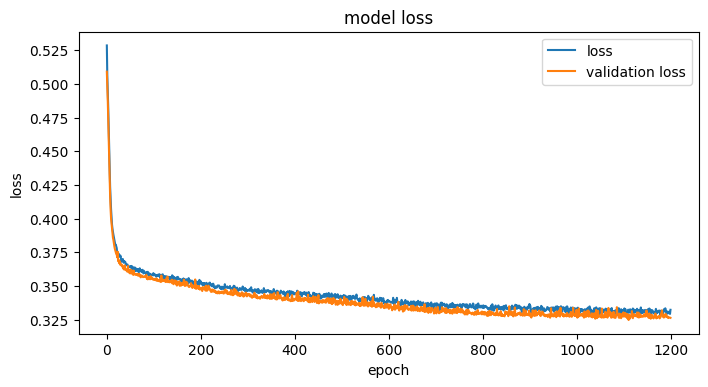

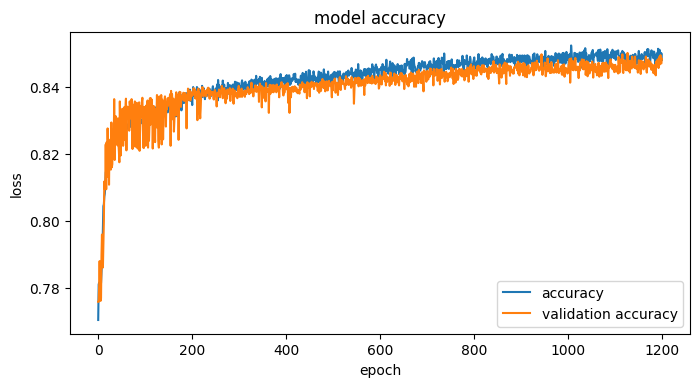

              precision    recall  f1-score   support

           0     0.8740    0.9229    0.8978      6196
           1     0.6994    0.5744    0.6307      1936

    accuracy                         0.8399      8132
   macro avg     0.7867    0.7486    0.7643      8132
weighted avg     0.8325    0.8399    0.8342      8132



/home/mauricio/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [21]:
plot_loss(h.history)
plot_acc(h.history)
print(classification_report(y_test, model1.predict_classes(x_test),digits= 4))

Como podemos notar en ambos gráficos ocurre lo esperado, en el primero podemos ver como el valor de la función de pérdida decrece de forma similar para los dos sets, mientras que el segundo gráfico ambos crecen similarmente.

Es importante destacar los "saltos" o "picos" que podemos observar en la función del accuracy esto puede ser debido a varios factores: el learning rate, la regularización que estamos imponiendo en las neuronas de nuestra red o el optimizar que estamos usando(Adam). 
Debido a esto decidimos crear un nuevo modelo idéntico en arquitectura pero modificando el optimizador, reemplazando por stochastic gradient descent (SDG).

## Segundo Modelo: Probando otro Optimizador

In [8]:
model2 = Sequential()
model2.add(Dense(80, activation='relu',input_shape=(25,)))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.SGD(learning_rate=0.001)
model2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model2.summary()

h = model2.fit(x_train, y_train, epochs=1200,batch_size=1000, verbose=0, validation_split=0.3)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 80)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 81        
Total params: 2,161
Trainable params: 2,161
Non-trainable params: 0
_________________________________________________________________


#### Metricas

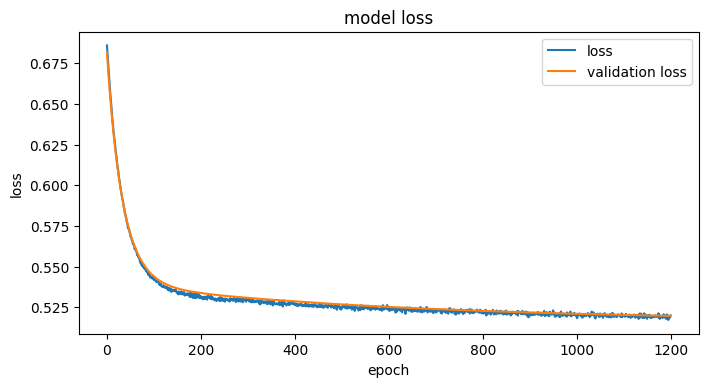

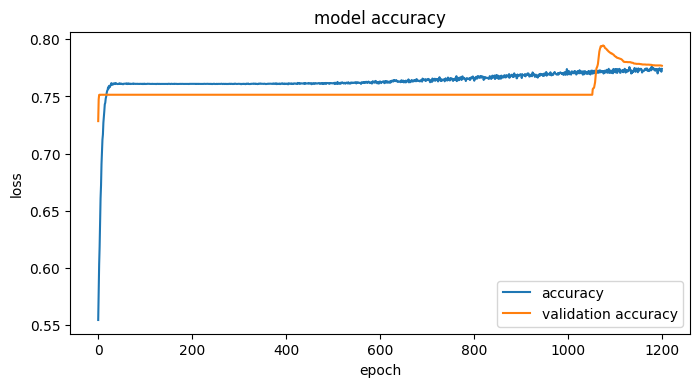

              precision    recall  f1-score   support

           0     0.7957    0.9572    0.8690      6196
           1     0.6091    0.2133    0.3160      1936

    accuracy                         0.7801      8132
   macro avg     0.7024    0.5853    0.5925      8132
weighted avg     0.7513    0.7801    0.7374      8132



In [9]:
plot_loss(h.history)
plot_acc(h.history)
print(classification_report(y_test, model2.predict_classes(x_test),digits= 4))

Como podemos observar en el gráfico del accuracy parece que el nuevo optimizador no mejoró el entrenamiento, sino que para la misma cantidad de epochs aprendió mucho menos. Esto último no solo lo podemos ver en el gráfico,tambien en el reporte podemos notar como métricas como la precisión paso de 0.695 a 0.609. Debido a esto decidimos volver a utilizar el optimizador Adam y probar modificando la arquitectura de nuestra red, ahora agregando una nueva capa oculta.

## Tercer modelo: Una nueva capa

In [10]:
model3 = Sequential()
model3.add(Dense(80, activation='relu',input_shape=(25,)))
model3.add(Dropout(0.5))
model3.add(Dense(10, activation='relu'))
model3.add(Dropout(0.25))
model3.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model3.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model3.summary()

h = model3.fit(x_train, y_train, epochs=3000,batch_size=1000, verbose=0, validation_split=0.3)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 80)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                810       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 2,901
Trainable params: 2,901
Non-trainable params: 0
_________________________________________________________________


#### Metricas

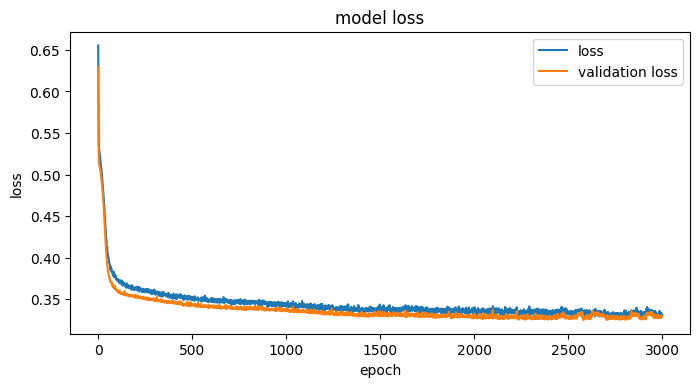

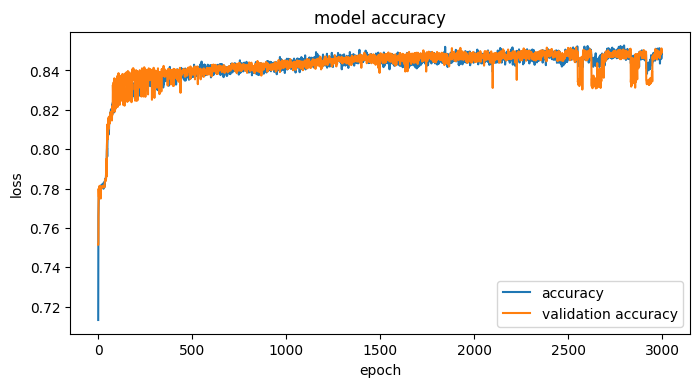

              precision    recall  f1-score   support

           0     0.8656    0.9353    0.8991      6196
           1     0.7209    0.5351    0.6143      1936

    accuracy                         0.8400      8132
   macro avg     0.7933    0.7352    0.7567      8132
weighted avg     0.8311    0.8400    0.8313      8132



In [11]:
plot_loss(h.history)
plot_acc(h.history)
print(classification_report(y_test,model3.predict_classes(x_test),digits= 4))

Podemos observar que volvemos a gráficos con "una curva de aprendizaje" más parecida a las del primer modelo, sin embargo no tenemos una gran mejora en los resultados aún habiendo aumentado la cantidad de neuronas y entrenado por el doble de epochs. De modo que probaremos con otro optimizador, en este caso con uno "más avanzado" (Adagrad), en la nueva arquitectura de 2 capas ocultas.

## Cuarto Modelo: Utilizando optimizador Adagrad

In [17]:
model4 = Sequential()
model4.add(Dense(80, activation='relu',input_shape=(25,)))
model4.add(Dropout(0.5))
model4.add(Dense(10, activation='relu'))
model4.add(Dropout(0.25))
model4.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adagrad(learning_rate=0.01)
model4.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model4.summary()

h = model4.fit(x_train, y_train, epochs=3000,batch_size=1000, verbose=0, validation_split=0.3)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 80)                2080      
_________________________________________________________________
dropout_8 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                810       
_________________________________________________________________
dropout_9 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 2,901
Trainable params: 2,901
Non-trainable params: 0
_________________________________________________________________


#### Metricas

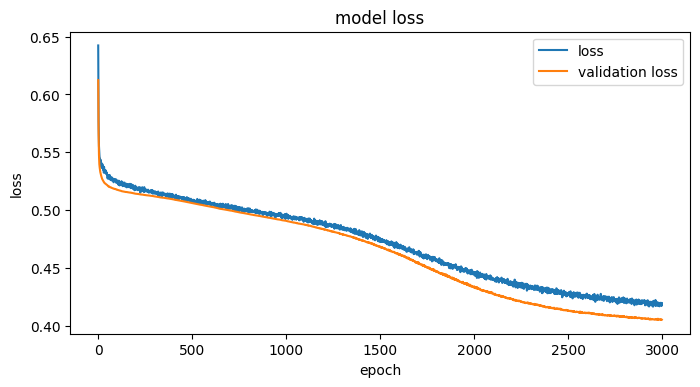

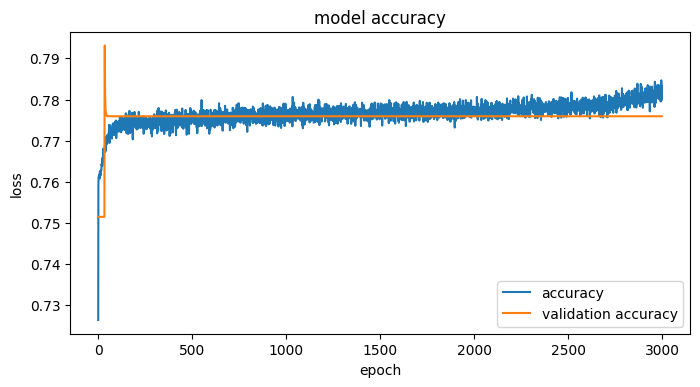

              precision    recall  f1-score   support

           0     0.7953    0.9551    0.8679      6196
           1     0.5977    0.2133    0.3144      1936

    accuracy                         0.7785      8132
   macro avg     0.6965    0.5842    0.5912      8132
weighted avg     0.7483    0.7785    0.7362      8132



In [18]:
plot_loss(h.history)
plot_acc(h.history)
print(classification_report(y_test,model4.predict_classes(x_test),digits= 4))

Nuevamente parece que el cambio de optimizar no nos da resultado a pesar de este ser "más potente" que el antes utilizado Adam. Podemos notar como la curva de loss desciende mucho más lento en comparación a los modelos anteriormente entrenados. Debido a esto decidimos volver a utilizar el optimizador Adam y volver a modificando la arquitectura de nuestra red, ahora agregando una tercera capa oculta.

## Quinto Modelo: Volviendo a Adam y Agregando una capa

In [19]:
model5 = Sequential()
model5.add(Dense(80, activation='relu',input_shape=(25,)))
model5.add(Dropout(0.5))
model5.add(Dense(40, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(5, activation='relu'))
model5.add(Dropout(0.25))
model5.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model5.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model5.summary()

h = model5.fit(x_train, y_train, epochs=4000,batch_size=1000, verbose=0, validation_split=0.3)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 80)                2080      
_________________________________________________________________
dropout_10 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 40)                3240      
_________________________________________________________________
dropout_11 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 5)                 205       
_________________________________________________________________
dropout_12 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                

#### Metricas

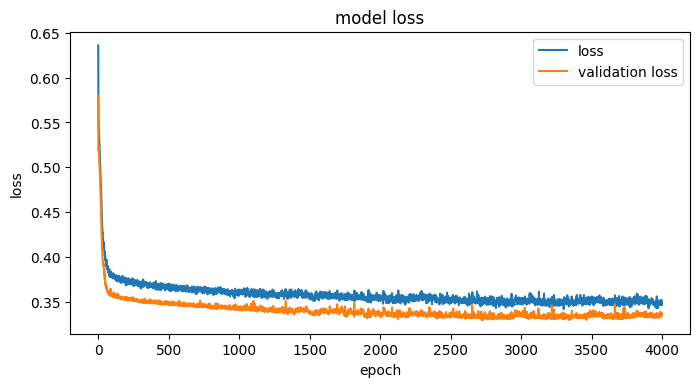

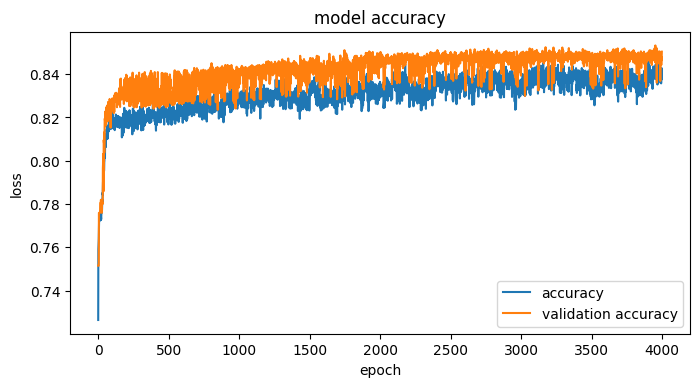

              precision    recall  f1-score   support

           0     0.8682    0.9364    0.9010      6196
           1     0.7281    0.5449    0.6233      1936

    accuracy                         0.8432      8132
   macro avg     0.7981    0.7407    0.7622      8132
weighted avg     0.8348    0.8432    0.8349      8132



In [20]:
plot_loss(h.history)
plot_acc(h.history)
print(classification_report(y_test,model5.predict_classes(x_test),digits= 4))

En este último modelos podemos ver que los resultados no difieren mucho de los demás modelos con menos capas. Si bien podemos notar mejoras en algunas métricas estas son compensadas con reducciones en otras. De modo que decidimos quedarnos, por navaja de ockham, con el modelo más sencillo con una única capa oculta.

También podemos ver que se sigue manifestando los "picos" en la gráfica del accuracy, esto puede deberse a la alta regularización que aplicamos en las neuronas o en el learning rate. Aunque para esto último decidimos no reducirlo más ya que estamos entrenando por muchas epochs y reducir en un orden este parámetro podría hacer que necesitemos muchas más para llegar a los mismos resultados.

### Otro preprocesamiento: MinMAX scaler y PCA

Con el nuevo preprocesamiento de los datos la idea es seguir un recorrido similar al realizado anteriormente para la construicion de nuestra red.

In [5]:
from preprocesamiento import preprocesar_df_min_max_scaler
from preprocesamiento import preprocesar_df_pca

df = obtenerDFTraining()
(X,y) = preprocesar_data_frame(df)
X_prepos = prepros_dummies(X[['ganancia_perdida_declarada_bolsa_argentina','trabajo','horas_trabajo_registradas',
                                      'estado_marital','edad','genero','anios_estudiados','horas_trabajo_registradas']])
X_prepos = preprocesar_df_min_max_scaler(X_prepos)
X_prepos = preprocesar_df_pca(X_prepos, 18)
x_train, x_test, y_train, y_test = train_test_split(X_prepos, y, test_size=0.25, random_state=RANDOM_STATE)

### Primer modelo: Una capa oculta

In [25]:
model6 = Sequential()
model6.add(Dense(50, activation='relu',input_shape=(18,)))
model6.add(Dropout(0.7))
model6.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model6.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model6.summary()

h = model6.fit(x_train, y_train, epochs=800,batch_size=50, verbose=4, validation_split=0.3)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 50)                950       
_________________________________________________________________
dropout_15 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 51        
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/800
Epoch 2/800
Epoch 3/800
Epoch 4/800
Epoch 5/800
Epoch 6/800
Epoch 7/800
Epoch 8/800
Epoch 9/800
Epoch 10/800
Epoch 11/800
Epoch 12/800
Epoch 13/800
Epoch 14/800
Epoch 15/800
Epoch 16/800
Epoch 17/800
Epoch 18/800
Epoch 19/800
Epoch 20/800
Epoch 21/800
Epoch 22/800
Epoch 23/800
Epoch 24/800
Epoch 25/800
Epoch 26/800
Epoch 27/800
Epoch 28/800
Epoch 29/800
Epoch 30/800
E

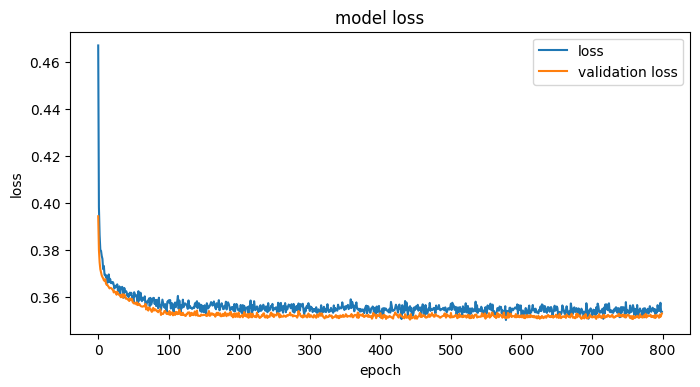

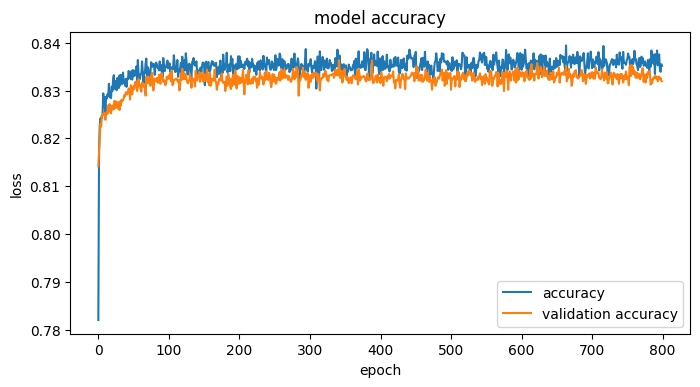

              precision    recall  f1-score   support

           0     0.8534    0.9364    0.8930      6196
           1     0.7044    0.4850    0.5745      1936

    accuracy                         0.8289      8132
   macro avg     0.7789    0.7107    0.7337      8132
weighted avg     0.8179    0.8289    0.8171      8132



/home/mauricio/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [26]:
plot_loss(h.history)
plot_acc(h.history)
print(classification_report(y_test, model6.predict_classes(x_test),digits= 4))

Como podemos observar en ambos gráficos la red rápidamente aprende y logra generalizar correctamente lo aprendido en el entrenamiento, también podemos ver que las métricas con ligeramente peor que su análogo con otro preprocesamiento.
Al igual que en el análisis anterior agregaremos una nueva capa oculta a la red, manteniendo constantes todos los demás parámetros.

### Segundo modelo: Dos capas ocultas

In [29]:
model7 = Sequential()
model7.add(Dense(50, activation='relu',input_shape=(18,)))
model7.add(Dropout(0.5))
model7.add(Dense(5, activation='relu'))
model7.add(Dropout(0.25))
model7.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model7.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model7.summary()

h = model7.fit(x_train, y_train, epochs=800,batch_size=1000, verbose=0, validation_split=0.3)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 50)                950       
_________________________________________________________________
dropout_18 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 5)                 255       
_________________________________________________________________
dropout_19 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 6         
Total params: 1,211
Trainable params: 1,211
Non-trainable params: 0
_________________________________________________________________


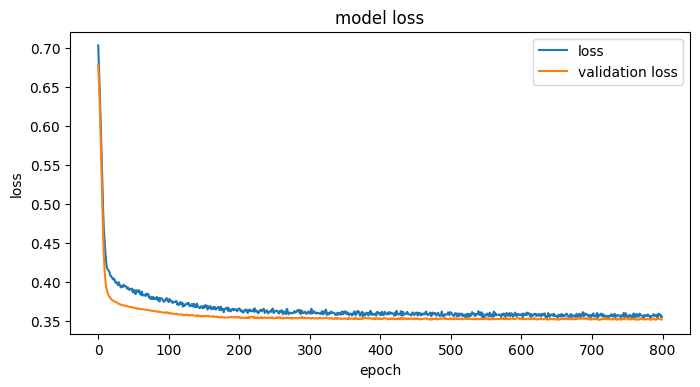

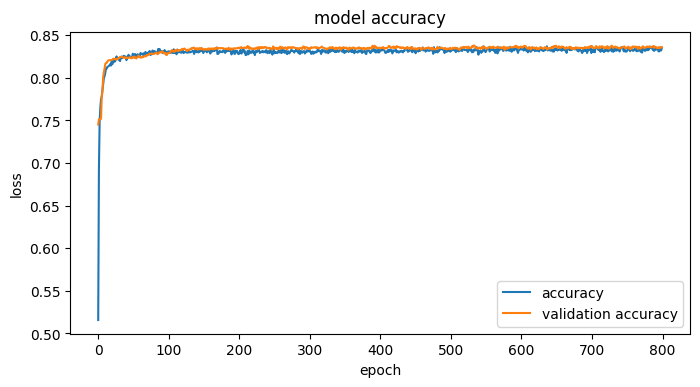

              precision    recall  f1-score   support

           0     0.8610    0.9246    0.8917      6196
           1     0.6840    0.5222    0.5923      1936

    accuracy                         0.8288      8132
   macro avg     0.7725    0.7234    0.7420      8132
weighted avg     0.8189    0.8288    0.8204      8132



/home/mauricio/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [30]:
plot_loss(h.history)
plot_acc(h.history)
print(classification_report(y_test, model7.predict_classes(x_test),digits= 4))

Al igual que en el preprocesamiento anterior parece que agregar una nueva capa no mejora significativamente el entrenamiento de nuestra red, tanto los gráficos como las métricas son similares. Por último decidimos volver a modificar el optimizador con la arquitectura de dos capas.

### Tercer modelo Un nuevo optimizador

In [17]:
model8 = Sequential()
model8.add(Dense(50, activation='relu',input_shape=(18,)))
model8.add(Dropout(0.5))
model8.add(Dense(5, activation='relu'))
model8.add(Dropout(0.25))
model8.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adagrad(learning_rate=0.001)
model8.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model8.summary()

h = model8.fit(x_train, y_train, epochs=1200,batch_size=1100, verbose=0, validation_split=0.3)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 50)                950       
_________________________________________________________________
dropout_10 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 255       
_________________________________________________________________
dropout_11 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 6         
Total params: 1,211
Trainable params: 1,211
Non-trainable params: 0
_________________________________________________________________


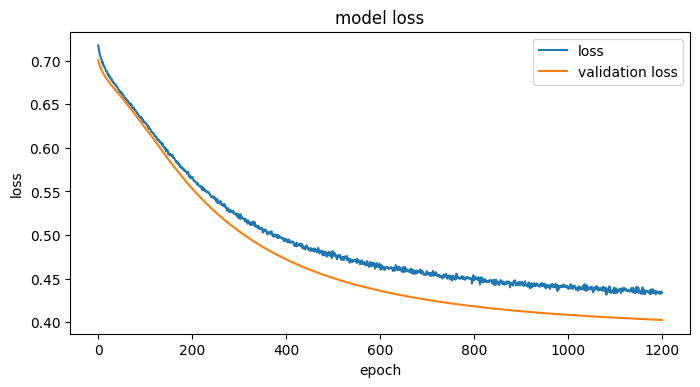

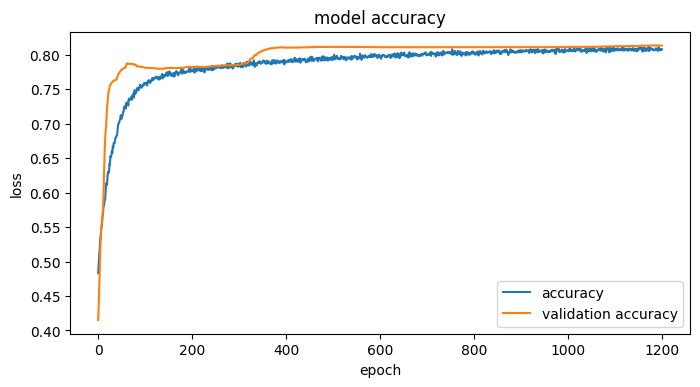

/home/mauricio/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0     0.8347    0.9338    0.8815      6196
           1     0.6583    0.4081    0.5038      1936

    accuracy                         0.8087      8132
   macro avg     0.7465    0.6709    0.6927      8132
weighted avg     0.7927    0.8087    0.7916      8132



In [18]:
plot_loss(h.history)
plot_acc(h.history)
print(classification_report(y_test, model8.predict_classes(x_test),digits= 4))

Como podemos ver en esta ocasión nuestro modelo parece estancarse en un accuracy del 0.80, sin embargo es importante destacar que aunque el optimizador Adam obtiene un mejor performance, con este preprocesamiento obtenemos mejores resultados para este optimizador que con el anteriormente probado.

De igual modo no encontramos un modelo que sea significativamente mejor a los antes vistos de modo que nos seguiremos quedando con el primer modelo entrenado.

### Modelo elegido: Curva ROC y matriz de confusion

Por último graficamos la curva ROC y la matriz de confusión del modelo seleccionado con el fin de dar un cierre a la exploración del modelo y mostrar las métricas obtenidas.

Modelo elegido: 
+ Una única capa oculta (80 neuronas | funcion de activacion: relu)
+ Neurona output (funcion de activacion: sigmoid)
+ Optimizador Adam (learning_rate 0.001)
+ función de loss: binary_crossentropy

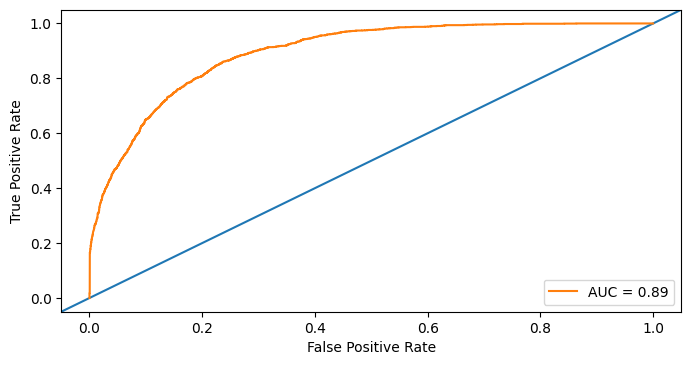

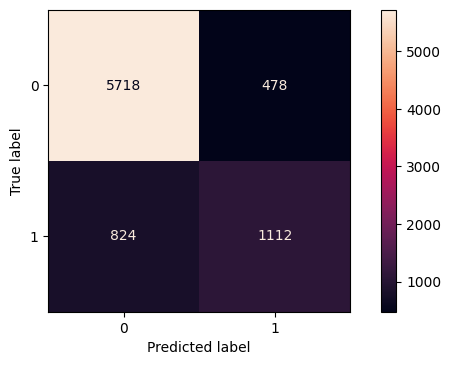

              precision    recall  f1-score   support

           0     0.8740    0.9229    0.8978      6196
           1     0.6994    0.5744    0.6307      1936

    accuracy                         0.8399      8132
   macro avg     0.7867    0.7486    0.7643      8132
weighted avg     0.8325    0.8399    0.8342      8132



/home/mauricio/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [27]:
df = obtenerDFTraining()
(X,y) = preprocesar_data_frame(df)
X_prepos = prepros_dummies(X[['ganancia_perdida_declarada_bolsa_argentina','trabajo','horas_trabajo_registradas',
                                      'estado_marital','edad','genero','anios_estudiados','horas_trabajo_registradas']])
X_prepos = preprocesar_normalize_scaler(X_prepos)
x_train, x_test, y_train, y_test = train_test_split(X_prepos, y, test_size=0.25, random_state=RANDOM_STATE)

plot_roc_auc_redes(x_test, y_test, model1)
plot_matriz_de_confusion_redes(x_test, y_test, model1)
print(classification_report(y_test, model1.predict_classes(x_test),digits= 4))

Como una pequeña conclusión sobre las métricas de nuestro modelo, podemos ver que si bien logra distinguir con muy buena precisión a las personas con bajo nivel adquisitivo, no logra lo mismo para las instancias con alto poder adquisitivo al clasificar un 42% de ellas incorrectamente.

Estos valores podrían verse alterados al modificar el umbral en el cual nosotros decidimos si una predicción de la red es 0 o 1. Todo este análisis se hizo utilizando 0.5 como punto de separación. Pero esto no es obligatorio y este umbral puede subir o bajar en función de las necesidades de nuestro problema. En esta ocasión decidimos dejarlo en 0.5 para no "favorecer" a ninguna métrica en especial, apuntando a que el modelo funcione satisfactoriamente en un contexto general.

### Prediccion sobre el Holdout

In [17]:
from preprocesamiento import obtenerDFHoldout
from preprocesamiento import escribir_predicciones_a_archivo

holdout = obtenerDFHoldout()

ids = np.array(holdout['id'])

holdout = prepros_dummies(holdout[['ganancia_perdida_declarada_bolsa_argentina','trabajo','horas_trabajo_registradas',
                                      'estado_marital','edad','genero','anios_estudiados','horas_trabajo_registradas']])
holdout = preprocesar_normalize_scaler(holdout)

predicciones_holdout = model1.predict_classes(holdout).flatten()
escribir_predicciones_a_archivo(predicciones_holdout,"Red Neuronal",ids)

/home/santi/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
